# Electric Vehicle Detection
The training set contains two months of smart meter power readings from 1590 houses.  The readings were taken at half-hour intervals.  Some of the homes have electric vehicles and some do not.
The file  "EV_train_labels.csv" indicates the time intervals on which an electric vehicle was charging (1 indicates a vehicle was charging at some point during the interval and 0 indicates no vehicle was charging at any point during the interval).

Can you determine:
1. Which residences have electric vehicles?
2. When the electric vehicles were charging?
3. Any other interesting aspects of the dataset?

A solution to part 2 might consist of a prediction of the probability that an electric car was charging for each house and time interval in the test set.

Please include code and explain your reasoning.

What do you expect the accuracy of your predictions to be?

## Begin Challenge

We first note that each reading is taken at a half-hour interval.

We start by looking at the training data.

### Import Libraries

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### Display a sample of the data

In [0]:
test = pd.read_csv('EV_test.csv', index_col = 'House ID')
test.head()

,Interval_1,Interval_2,Interval_3,Interval_4,Interval_5,Interval_6,Interval_7,Interval_8,Interval_9,Interval_10,Interval_11,Interval_12,Interval_13,Interval_14,Interval_15,Interval_16,Interval_17,Interval_18,Interval_19,Interval_20,Interval_21,Interval_22,Interval_23,Interval_24,Interval_25,Interval_26,Interval_27,Interval_28,Interval_29,Interval_30,Interval_31,Interval_32,Interval_33,Interval_34,Interval_35,Interval_36,Interval_37,Interval_38,Interval_39,Interval_40,...,Interval_2841,Interval_2842,Interval_2843,Interval_2844,Interval_2845,Interval_2846,Interval_2847,Interval_2848,Interval_2849,Interval_2850,Interval_2851,Interval_2852,Interval_2853,Interval_2854,Interval_2855,Interval_2856,Interval_2857,Interval_2858,Interval_2859,Interval_2860,Interval_2861,Interval_2862,Interval_2863,Interval_2864,Interval_2865,Interval_2866,Interval_2867,Interval_2868,Interval_2869,Interval_2870,Interval_2871,Interval_2872,Interval_2873,Interval_2874,Interval_2875,Interval_2876,Interval_2877,Interval_2878,Interval_2879,Interval_2880
House ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11643173,1.013,0.215,0.217,0.217,0.217,0.220,0.220,0.215,0.215,0.213,0.221,0.968,0.211,0.454,1.410,0.559,0.408,0.907,1.162,0.733000,0.982000,0.276000,0.213000,0.236,0.215,0.217,0.209,0.213,0.214,0.323,0.887000,0.322000,0.813000,0.853,1.01782,1.206,0.756,1.086,0.934,3.478,...,0.214,0.256,0.527,1.034,1.215,1.669,0.233,0.214,0.214,0.218,0.955,0.231,0.809,0.368,0.424,0.431,0.543,0.954,0.647,0.367,0.557,0.613,0.581,0.571,0.469,1.080,1.095,1.510,2.241,0.449,1.059,0.308,1.248,0.236,0.206,0.210,0.218,0.219,0.909,0.202
11655020,1.325,1.413,0.813,0.588,0.213,0.175,0.163,0.200,0.175,0.200,0.900,0.625,0.350,0.238,0.163,0.275,0.838,0.375,0.300,0.325000,0.288000,0.588000,0.213000,0.813,3.313,3.175,2.913,2.900,2.738,2.438,4.254189,4.125256,2.271067,0.600,0.82500,0.850,0.775,0.925,0.775,0.675,...,0.188,0.188,0.225,0.250,0.538,0.450,0.713,0.938,0.950,1.000,0.438,0.188,0.175,0.188,1.188,0.638,0.288,0.275,0.400,0.288,0.375,0.438,0.725,0.638,0.613,0.813,2.138,0.638,0.825,0.938,0.750,0.625,0.450,1.325,0.350,0.313,0.188,0.200,0.188,0.175
11644367,1.543,1.636,1.683,1.556,1.935,2.393,2.601,2.709,2.590,2.673,1.999,2.262,2.310,2.432,2.378,2.324,2.165,2.403,2.330,2.405000,2.368000,2.245000,1.637000,2.446,2.200,2.393,2.304,2.285,2.203,2.381,2.337000,2.316000,2.246000,2.436,1.74700,2.389,2.330,2.191,2.262,2.483,...,2.759,2.530,1.842,2.595,3.673,3.581,3.552,3.826,4.965,5.076,4.870,4.442,4.374,4.647,4.800,5.156,4.620,4.341,4.180,4.104,4.161,4.913,4.797,3.943,3.879,3.128,1.675,2.096,1.947,1.850,2.208,2.423,2.458,2.487,2.354,2.444,2.430,2.275,1.914,1.497
11633356,0.153,0.123,0.146,0.101,0.140,0.108,0.121,0.127,0.110,0.132,0.104,0.117,0.124,0.121,0.356,0.431,0.307,0.675,0.597,0.695000,2.122000,2.143000,2.194000,2.194,1.311,0.319,0.441,0.950,2.592,4.147,2.824000,2.768000,3.468000,2.255,0.83300,0.623,0.874,2.570,3.262,3.188,...,0.124,0.083,0.068,0.042,0.046,0.190,0.128,0.166,0.427,0.326,0.200,0.323,0.137,0.049,0.066,0.050,0.056,0.055,0.049,0.086,0.031,0.063,0.038,0.052,0.050,0.040,0.061,0.028,0.061,0.037,0.216,0.237,0.213,0.258,0.275,0.219,0.218,0.079,0.049,0.055
11649905,0.187,0.004,0.004,0.004,0.004,0.004,0.005,0.004,0.004,0.005,0.004,0.005,0.004,0.004,0.005,0.345,0.524,0.508,0.584,2.937024,4.567256,5.118256,3.420232,1.903,1.251,0.832,0.830,1.443,0.213,0.064,0.738000,0.634000,0.905000,1.878,1.07900,0.437,0.004,0.005,0.165,0.715,...,0.004,0.005,0.004,0.004,0.005,0.004,0.004,0.074,0.535,0.528,0.797,1.076,1.075,1.067,1.072,1.061,0.768,0.524,0.527,0.524,0.528,0.529,0.521,0.527,0.309,1.147,1.061,0.004,0.004,0.004,0.004,0.005,0.526,0.005,0.004,0.004,0.004,0.004,0.004,0.004


In [0]:
test.shape

(699, 2880)

In [0]:
train = pd.read_csv('EV_train.csv', index_col = 'House ID')
train.head()

,Interval_1,Interval_2,Interval_3,Interval_4,Interval_5,Interval_6,Interval_7,Interval_8,Interval_9,Interval_10,Interval_11,Interval_12,Interval_13,Interval_14,Interval_15,Interval_16,Interval_17,Interval_18,Interval_19,Interval_20,Interval_21,Interval_22,Interval_23,Interval_24,Interval_25,Interval_26,Interval_27,Interval_28,Interval_29,Interval_30,Interval_31,Interval_32,Interval_33,Interval_34,Interval_35,Interval_36,Interval_37,Interval_38,Interval_39,Interval_40,...,Interval_2841,Interval_2842,Interval_2843,Interval_2844,Interval_2845,Interval_2846,Interval_2847,Interval_2848,Interval_2849,Interval_2850,Interval_2851,Interval_2852,Interval_2853,Interval_2854,Interval_2855,Interval_2856,Interval_2857,Interval_2858,Interval_2859,Interval_2860,Interval_2861,Interval_2862,Interval_2863,Interval_2864,Interval_2865,Interval_2866,Interval_2867,Interval_2868,Interval_2869,Interval_2870,Interval_2871,Interval_2872,Interval_2873,Interval_2874,Interval_2875,Interval_2876,Interval_2877,Interval_2878,Interval_2879,Interval_2880
House ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11655099,0.950,0.826,0.361,0.238,0.342,0.233000,0.351000,0.194000,0.292000,0.234,0.260,0.274,0.192,0.329,0.192,0.443,0.260,0.222,0.419,0.249,0.429,0.426,0.373,0.335,0.457,1.199,1.735,1.431,1.151,1.258,1.243,0.825,0.534,0.513,0.775,0.708,0.655,0.618,0.600,0.577,...,0.457,0.456,0.529,0.295,0.488,0.458,0.366,0.355,0.186,0.300,0.181,0.276,0.219,0.219,0.265,0.179,0.299,0.181,0.383,0.573,0.304,0.473,0.389,0.703,0.924,0.856,0.690,0.568,0.791,0.752,0.664,0.783,0.601,0.639,0.417,0.439,0.226,0.190,0.710,0.728
11633257,0.353,0.327,0.358,0.292,0.285,0.304000,0.361000,0.342000,0.355000,0.348,0.342,0.261,0.276,0.334,0.411,0.269,0.338,0.818,0.914,0.835,0.852,0.911,0.919,0.917,0.905,0.898,0.844,0.892,0.873,0.865,0.860,0.388,0.298,0.413,0.350,0.345,0.281,0.411,0.442,0.492,...,0.369,0.349,0.339,0.353,0.473,0.512,0.397,0.513,0.565,0.834,1.105,1.105,0.951,0.965,1.133,0.968,1.254,0.999,0.934,0.917,1.008,1.003,1.599,0.696,0.863,0.813,0.581,0.748,0.655,0.654,0.536,0.558,0.622,0.634,0.513,0.421,0.273,0.296,0.291,0.289
11651552,0.150,0.181,0.150,0.150,0.131,0.125000,0.088000,0.106000,0.094000,1.019,0.094,0.394,0.375,0.444,0.150,0.713,0.175,0.175,0.131,0.700,0.288,0.200,0.244,0.819,0.500,0.231,0.231,0.225,0.200,0.163,0.200,0.344,0.388,1.550,3.694,2.738,1.463,1.175,1.675,1.288,...,0.094,0.425,0.650,0.119,0.194,0.281,0.825,1.169,0.463,0.450,1.719,0.688,0.181,0.181,0.238,0.306,0.306,0.244,0.225,0.356,0.188,1.063,0.150,0.194,0.856,0.463,0.863,1.938,1.494,1.106,2.125,0.881,0.481,1.194,0.138,0.119,0.038,0.088,0.056,0.113
11636092,2.088,2.075,2.121,2.098,2.046,2.081000,1.847000,0.420000,0.399000,0.364,0.413,0.363,0.397,0.377,0.971,0.966,0.930,1.155,1.285,1.207,1.166,1.173,0.693,0.467,0.595,1.866,0.747,0.550,0.744,0.693,1.145,1.140,1.113,1.080,1.338,2.540,1.300,1.911,3.071,2.411,...,0.356,0.308,0.344,0.315,0.336,0.322,0.815,0.962,1.071,0.980,0.941,0.938,0.927,0.968,0.555,0.534,0.426,0.472,0.441,0.456,0.502,0.426,0.943,1.017,1.040,2.158,2.348,2.157,1.158,0.960,0.620,0.487,0.563,0.419,0.379,0.359,0.347,0.325,0.330,0.340
11647239,1.416,1.250,1.270,1.258,1.239,1.753105,4.609256,4.619256,4.075151,1.230,1.192,1.212,1.195,1.184,1.193,1.182,1.176,1.196,1.202,1.248,1.209,1.218,1.216,1.214,1.228,1.193,1.188,1.203,1.190,1.200,1.183,1.185,1.181,1.189,1.197,1.183,1.225,1.223,1.313,1.616,...,1.220,1.222,1.241,1.306,1.230,1.234,1.260,1.194,1.204,1.200,1.192,1.233,1.290,1.227,1.218,1.227,1.216,1.187,1.202,1.207,1.200,1.257,1.245,1.241,1.247,1.208,1.203,1.231,1.205,1.630,1.596,1.667,1.569,1.664,1.580,1.635,1.568,1.565,1.575,1.571


In [0]:
train.shape

(1590, 2880)

In [0]:
labels = pd.read_csv('EV_train_labels.csv', index_col='House ID')
labels.head()

,Interval_1,Interval_2,Interval_3,Interval_4,Interval_5,Interval_6,Interval_7,Interval_8,Interval_9,Interval_10,Interval_11,Interval_12,Interval_13,Interval_14,Interval_15,Interval_16,Interval_17,Interval_18,Interval_19,Interval_20,Interval_21,Interval_22,Interval_23,Interval_24,Interval_25,Interval_26,Interval_27,Interval_28,Interval_29,Interval_30,Interval_31,Interval_32,Interval_33,Interval_34,Interval_35,Interval_36,Interval_37,Interval_38,Interval_39,Interval_40,...,Interval_2841,Interval_2842,Interval_2843,Interval_2844,Interval_2845,Interval_2846,Interval_2847,Interval_2848,Interval_2849,Interval_2850,Interval_2851,Interval_2852,Interval_2853,Interval_2854,Interval_2855,Interval_2856,Interval_2857,Interval_2858,Interval_2859,Interval_2860,Interval_2861,Interval_2862,Interval_2863,Interval_2864,Interval_2865,Interval_2866,Interval_2867,Interval_2868,Interval_2869,Interval_2870,Interval_2871,Interval_2872,Interval_2873,Interval_2874,Interval_2875,Interval_2876,Interval_2877,Interval_2878,Interval_2879,Interval_2880
House ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11655099,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11633257,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11651552,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11636092,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11647239,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
labels.shape

(1590, 2880)

Now to plot the data

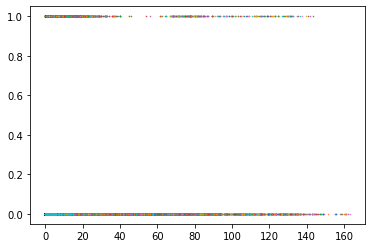

In [0]:
import matplotlib.pyplot as plt
plt.plot(train, labels,'.', ms=1)
plt.show()

## Question 1 (Training Data): Which residences have electric vehicles?
We are told that not every home has an electric vehicle and those with a 1 in the *EV_train_labels.csv* do. Therefore, the following houses have electric vehicles:

In [0]:
numOfHousesWithCars = labels[labels == 1].dropna(how='all').fillna(0)
numOfHousesWithCars

,Interval_1,Interval_2,Interval_3,Interval_4,Interval_5,Interval_6,Interval_7,Interval_8,Interval_9,Interval_10,Interval_11,Interval_12,Interval_13,Interval_14,Interval_15,Interval_16,Interval_17,Interval_18,Interval_19,Interval_20,Interval_21,Interval_22,Interval_23,Interval_24,Interval_25,Interval_26,Interval_27,Interval_28,Interval_29,Interval_30,Interval_31,Interval_32,Interval_33,Interval_34,Interval_35,Interval_36,Interval_37,Interval_38,Interval_39,Interval_40,...,Interval_2841,Interval_2842,Interval_2843,Interval_2844,Interval_2845,Interval_2846,Interval_2847,Interval_2848,Interval_2849,Interval_2850,Interval_2851,Interval_2852,Interval_2853,Interval_2854,Interval_2855,Interval_2856,Interval_2857,Interval_2858,Interval_2859,Interval_2860,Interval_2861,Interval_2862,Interval_2863,Interval_2864,Interval_2865,Interval_2866,Interval_2867,Interval_2868,Interval_2869,Interval_2870,Interval_2871,Interval_2872,Interval_2873,Interval_2874,Interval_2875,Interval_2876,Interval_2877,Interval_2878,Interval_2879,Interval_2880
House ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11647239,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11655054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11635803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11642383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11655167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11636671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11635588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11643663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [0]:
print(f"There are {len(numOfHousesWithCars)} of {len(labels)} houses that have electric cars in the training data")

There are 485 of 1590 houses that have electric cars in the training data


These houses have the following House IDs:

In [0]:
numOfHousesWithCars.index.values

array([11647239, 11655054, 11635803, 11642383, 11655167, 11643133,
       11646352, 11633451, 11640674, 11649350, 11641311, 11641132,
       11628301, 11629960, 11644486, 11641268, 11635804, 11639449,
       11644660, 11644408, 11629816, 11639710, 11640174, 11643247,
       11653425, 11642830, 11646946, 11640966, 11634017, 11630200,
       11632371, 11640219, 11628585, 11630579, 11640980, 11639657,
       11650539, 11642554, 11650340, 11647463, 11651611, 11632955,
       11639146, 11628886, 11633116, 11639954, 11633355, 11646091,
       11637442, 11633207, 11650665, 11629911, 11650049, 11636850,
       11628441, 11632591, 11630114, 11653583, 11642236, 11641173,
       11630263, 11648179, 11649804, 11632624, 11639969, 11651336,
       11638874, 11632923, 11638619, 11635818, 11647352, 11641197,
       11635175, 11648019, 11630833, 11632206, 11633230, 11651463,
       11634042, 11653790, 11632174, 11647094, 11633870, 11633889,
       11643481, 11643467, 11654189, 11654647, 11629322, 11637

## Question 2 (Training Data): When the electric vehicles were charging?

In [0]:
numOfHousesWithCars_Transposed = numOfHousesWithCars.T
m1 = numOfHousesWithCars_Transposed.diff() == 1.0
m2 = numOfHousesWithCars_Transposed.diff() == -1.0
df = numOfHousesWithCars_Transposed[m1 | m2].T
df.head()

,Interval_1,Interval_2,Interval_3,Interval_4,Interval_5,Interval_6,Interval_7,Interval_8,Interval_9,Interval_10,Interval_11,Interval_12,Interval_13,Interval_14,Interval_15,Interval_16,Interval_17,Interval_18,Interval_19,Interval_20,Interval_21,Interval_22,Interval_23,Interval_24,Interval_25,Interval_26,Interval_27,Interval_28,Interval_29,Interval_30,Interval_31,Interval_32,Interval_33,Interval_34,Interval_35,Interval_36,Interval_37,Interval_38,Interval_39,Interval_40,...,Interval_2841,Interval_2842,Interval_2843,Interval_2844,Interval_2845,Interval_2846,Interval_2847,Interval_2848,Interval_2849,Interval_2850,Interval_2851,Interval_2852,Interval_2853,Interval_2854,Interval_2855,Interval_2856,Interval_2857,Interval_2858,Interval_2859,Interval_2860,Interval_2861,Interval_2862,Interval_2863,Interval_2864,Interval_2865,Interval_2866,Interval_2867,Interval_2868,Interval_2869,Interval_2870,Interval_2871,Interval_2872,Interval_2873,Interval_2874,Interval_2875,Interval_2876,Interval_2877,Interval_2878,Interval_2879,Interval_2880
House ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11647239,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11655054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11635803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11642383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11655167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here we see the number of times an electric vehicle has been plugged in and deplugged. Any odd numbers indicate that a car was either currently plugged in before the intervals began or it was plugged in when the intervals ended. Otherwise, all charge cycles happened during the data acquisition period.

In [0]:
df.T.count()

House ID
11647239    102
11655054     90
11635803    100
11642383     94
11655167    118
           ... 
11636671     84
11635588     88
11643663     96
11647508     94
11650303     90
Length: 485, dtype: int64

## Begin Analysis With

We begin by exploring the data in the test set (as we already know what is in the labels data frame).

Let's see what we can learn about each House. Though we'll do so after we drop duplicates

In [0]:
print(train.shape)
print(labels.shape)
print(test.shape)

(1590, 2880)
(1590, 2880)
(699, 2880)


In [0]:
train.dtypes.unique()

array([dtype('float64')], dtype=object)

It seems that every value in the dataset is a number (an integer or a float).

In [0]:
train.describe()

,Interval_1,Interval_2,Interval_3,Interval_4,Interval_5,Interval_6,Interval_7,Interval_8,Interval_9,Interval_10,Interval_11,Interval_12,Interval_13,Interval_14,Interval_15,Interval_16,Interval_17,Interval_18,Interval_19,Interval_20,Interval_21,Interval_22,Interval_23,Interval_24,Interval_25,Interval_26,Interval_27,Interval_28,Interval_29,Interval_30,Interval_31,Interval_32,Interval_33,Interval_34,Interval_35,Interval_36,Interval_37,Interval_38,Interval_39,Interval_40,...,Interval_2841,Interval_2842,Interval_2843,Interval_2844,Interval_2845,Interval_2846,Interval_2847,Interval_2848,Interval_2849,Interval_2850,Interval_2851,Interval_2852,Interval_2853,Interval_2854,Interval_2855,Interval_2856,Interval_2857,Interval_2858,Interval_2859,Interval_2860,Interval_2861,Interval_2862,Interval_2863,Interval_2864,Interval_2865,Interval_2866,Interval_2867,Interval_2868,Interval_2869,Interval_2870,Interval_2871,Interval_2872,Interval_2873,Interval_2874,Interval_2875,Interval_2876,Interval_2877,Interval_2878,Interval_2879,Interval_2880
count,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,...,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000
mean,1.037561,0.984006,0.932316,0.924215,0.898200,0.862903,0.858417,0.852371,0.862495,0.853966,0.851773,0.869540,0.931510,1.016952,1.082427,1.165621,1.245049,1.314958,1.410028,1.434863,1.465887,1.503123,1.533994,1.566908,1.563920,1.549630,1.549436,1.505837,1.519813,1.546502,1.523402,1.524018,1.582817,1.653722,1.716072,1.749476,1.875022,1.884309,1.848151,1.777020,...,0.851856,0.869663,0.920907,1.027013,1.140383,1.246177,1.311053,1.382332,1.446943,1.441113,1.407078,1.398856,1.375105,1.366649,1.352747,1.329508,1.316093,1.288775,1.282537,1.279991,1.280627,1.284595,1.293554,1.293285,1.285301,1.285580,1.268291,1.256928,1.229095,1.236451,1.219427,1.190255,1.148241,1.086285,1.037184,0.960494,0.896978,0.853052,0.796864,0.771835
std,2.709620,2.570142,2.576027,2.597699,2.502384,2.471793,2.408633,2.386089,2.433219,2.408104,2.424449,2.462633,2.850949,2.866845,3.026785,3.115790,3.219894,3.289918,3.576336,3.460135,3.531550,3.571435,3.516803,3.621175,3.580891,3.522354,3.624027,3.508180,3.442333,3.492719,3.442179,3.468539,3.518091,3.749080,3.743909,3.655490,3.752993,3.640843,3.473453,3.433262,...,2.569904,2.610802,2.712607,2.860055,3.085621,3.358161,3.555749,3.750129,4.121403,4.088157,4.023829,4.076687,4.068502,3.922921,3.807708,3.787791,3.909116,3.836011,3.871204,3.907082,3.807732,3.650485,3.380217,3.156379,3.078910,2.939758,2.807778,2.802371,2.766212,2.758447,2.691628,2.697219,2.631514,2.538938,2.453865,2.349095,2.368018,2.385161,2.309731,2.230232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

Let's see how many NaNs there are and then fill them with the average of the points on the left and right of each NaN.

In [0]:
count = train.isna().sum()
print("Indices that at least 1 NaN")
print(type(count))
# For some reason, pd.Series.nonzero() quit working...
# print(count.nonzero()) 
print(count[count!=0])
print(type(count[count!=0]))

Indices that at least 1 NaN
<class 'pandas.core.series.Series'>
Interval_2449    1
Interval_2450    1
Interval_2451    1
Interval_2452    1
Interval_2453    1
                ..
Interval_2876    4
Interval_2877    4
Interval_2878    4
Interval_2879    4
Interval_2880    4
Length: 432, dtype: int64
<class 'pandas.core.series.Series'>


Oh, looks like there are only NaNs in the last 9 days. We'll just remove them

In [0]:
# train.drop(count[count!=0].index, axis=1, inplace=True)
# labels.drop(count[count!=0].index, axis=1, inplace=True)
# For some reason, pd.Series.nonzero() quit working...
# train.drop(train.columns[count.nonzero()[0]], axis=1, inplace=True)
# labels.drop(labels.columns[count.nonzero()[0]], axis=1, inplace=True)
while True:
  count = train.isna().sum()
  print("Indices that at least 1 NaN")
  print(count[count!=0].index)
  print(len(count[count!=0].index))
  if not len(count[count!=0].index) :
  # print(count.nonzero())
  # print(count.iloc[count.nonzero()])
  # print(len(count.nonzero()[0]))
  # if not len(count.nonzero()[0]) :
    break
  train.where(train.notna(), 
              other=(train.fillna(method='ffill') + train.fillna(method='bfill'))/2,
              inplace = True)

Indices that at least 1 NaN
Index(['Interval_2449', 'Interval_2450', 'Interval_2451', 'Interval_2452',
       'Interval_2453', 'Interval_2454', 'Interval_2455', 'Interval_2456',
       'Interval_2457', 'Interval_2458',
       ...
       'Interval_2871', 'Interval_2872', 'Interval_2873', 'Interval_2874',
       'Interval_2875', 'Interval_2876', 'Interval_2877', 'Interval_2878',
       'Interval_2879', 'Interval_2880'],
      dtype='object', length=432)
432
Indices that at least 1 NaN
Index([], dtype='object')
0


And let's see if we filled in all of the NaNs

In [0]:
count = train.isna().sum()
print("Indices that at least 1 NaN")
# print(count.nonzero())
print(count[count!=0])
print(train.shape)
print(labels.shape)

Indices that at least 1 NaN
Series([], dtype: int64)
(1590, 2880)
(1590, 2880)


Check if labels has NaNs and repeat process

In [0]:
count = labels.isna().sum()
print("Indices that at least 1 NaN")
# print(count.nonzero())
print(count[count!=0])
print(train.shape)
print(labels.shape)

Indices that at least 1 NaN
Series([], dtype: int64)
(1590, 2880)
(1590, 2880)


Alright, now that we've done a brief preliminary analysis of the data let's move on 

## Train, Test, and Cross-Valiation
We're going to evaluate each data point as a time series

In [0]:
print(train.shape)
print(labels.shape)

(1590, 2880)
(1590, 2880)


In [0]:
halfHours = 24 * 2 # Number of Half Hours In A Day
train_data, labels_data = [], []
for index, row in train.iterrows():
  # Break down each house's data into a mxn array (m - # of half hours in a day)
  train_data.append(np.array(row).reshape(halfHours, -1))
for index, row in labels.iterrows():
  # Break down each house's label data into a mxn array (m - # of half hours in a day)
  labels_data.append(np.array(row).reshape(halfHours, -1))
train_data, labels_data = np.array(train_data), np.array(labels_data)

In [0]:
train_data.shape

(1590, 48, 60)

Why a CNN? It's more of an experimentation. I saw that using non-image data as images would allow me to work with nonlinear modeling. So, I wanted to try it out with this set of data.

In [0]:
import torch.nn as nn
from torch.utils.data import Dataset
import torchvision
class CNN(nn.Module):
  def __init__(self,inputshape,outputshape):
    super(CNN,self).__init__()
    layers = []
    # layers.append(nn.Flatten(-1))
    layers.append(nn.Conv2d(1,1024,kernel_size=1)) #2,3
    layers.append(nn.BatchNorm2d(1024))
    layers.append(nn.MaxPool2d(2, stride=2))
    layers.append(nn.LeakyReLU(inplace=True))
    self.cnn1 = nn.Sequential(*layers)
    layers = []
    layers.append(nn.Conv2d(1024,512,kernel_size=3))
    layers.append(nn.BatchNorm2d(512))
    layers.append(nn.MaxPool2d(2, stride=2))
    layers.append(nn.LeakyReLU(inplace=True))
    self.cnn2 = nn.Sequential(*layers)
    layers = []
    layers.append(nn.Conv2d(512,1024,kernel_size=3))
    layers.append(nn.BatchNorm2d(1024))
    layers.append(nn.MaxPool2d(2, stride=2))
    layers.append(nn.LeakyReLU(inplace=True))
    self.cnn3 = nn.Sequential(*layers)
    layers = []
    layers.append(nn.Conv2d(1024,np.prod(outputshape),kernel_size=3))
    layers.append(nn.AdaptiveAvgPool2d(1))
    layers.append(nn.Sigmoid())
    self.cnn = nn.Sequential(*layers)
    
  def forward(self,x):
    # print(x.shape)
    x = self.cnn1(x)
    # print(x.shape)
    x = self.cnn2(x)
    # print(x.shape)
    x = self.cnn3(x)
    # print(x.shape)
    out = self.cnn(x)
    # print(out.shape)
    return out

class MyDataset(Dataset):
  def __init__(self,train,labels):
    self.transform = torchvision.transforms.ToTensor()
    self.train = train
    self.labels = labels
  def __len__(self):
    return len(self.train)
  def __getitem__(self,i):
    return self.transform(self.train[i]).float(),self.transform(self.labels[i]).float()

In [0]:
# Split the dataset to train and test data
train_X, test_X, train_y, test_y = train_test_split(train_data,
                                                    labels_data,
                                                    test_size=0.1,
                                                    random_state=10000)
train_X, val_X, train_y, val_y = train_test_split(train_X,
                                                    train_y,
                                                    test_size=0.1,
                                                    random_state=10000)

In [0]:
import torch
EPOCHS = 300
# LR = 0.01
LR = 1
MOMENTUM = 0.9
BATCH_SIZE=30 # More batches, better approximation of space (though less steps per epoch)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
CRITERION = nn.MSELoss()
# data = MyDataset(train_data,labels_data)
data = MyDataset(train_X,train_y)
loader = torch.utils.data.DataLoader(data,batch_size=BATCH_SIZE,drop_last=True)

valdata = MyDataset(val_X, val_y)
valloader = torch.utils.data.DataLoader(valdata,batch_size=BATCH_SIZE,drop_last=True)
# model = CNN(np.shape(train_data[0]),np.shape(labels_data[0]))
model = CNN(np.shape(train_X[0]),np.shape(train_y[0]))
if torch.cuda.is_available():
  model = nn.DataParallel(model)

optimizer = torch.optim.SGD(model.parameters(),lr=LR,momentum=MOMENTUM)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,EPOCHS*100)
model.to(device)
epoch = 0
patience = 10
prevloss = 1000000
while True:
  print("EPOCH ",epoch)
  epoch+=1
  model.train()
  for x,y in loader:
    # print(np.shape(x),np.shape(y))
    x,y = x.to(device),y.to(device)
    optimizer.zero_grad()
    pred = model(x).reshape(BATCH_SIZE,1,train_data.shape[1], train_data.shape[2])
    loss = CRITERION(pred,y)
    loss.backward()
    optimizer.step()
    
  model.eval()
  valloss = 0
  for x,y in valloader:
    x,y = x.to(device),y.to(device)
    pred = model(x).reshape(BATCH_SIZE,1,train_data.shape[1], train_data.shape[2])
    valloss += CRITERION(pred,y)
  if epoch > EPOCHS:
    print("HIT MAX")
    break
  # print(f"valloss/len(valloader): {valloss/len(valloader)}")
  # print(f"prevloss: {prevloss}")
  if valloss/len(valloader) > prevloss:
    print(f" counter: {counter}")
    counter +=1
    if patience < counter:
      break
  else:
    counter=0
    prevloss = valloss/len(valloader)
  scheduler.step()
    

EPOCH  0
EPOCH  1
 counter: 0
EPOCH  2
 counter: 1
EPOCH  3
 counter: 2
EPOCH  4
 counter: 3
EPOCH  5
 counter: 4
EPOCH  6
 counter: 5
EPOCH  7
 counter: 6
EPOCH  8
 counter: 7
EPOCH  9
 counter: 8
EPOCH  10
EPOCH  11
 counter: 0
EPOCH  12
EPOCH  13
EPOCH  14
EPOCH  15
 counter: 0
EPOCH  16
EPOCH  17
EPOCH  18
 counter: 0
EPOCH  19
EPOCH  20
EPOCH  21
 counter: 0
EPOCH  22
EPOCH  23
EPOCH  24
 counter: 0
EPOCH  25
EPOCH  26
 counter: 0
EPOCH  27
EPOCH  28
EPOCH  29
EPOCH  30
EPOCH  31
EPOCH  32
EPOCH  33
EPOCH  34
EPOCH  35
 counter: 0
EPOCH  36
EPOCH  37
 counter: 0
EPOCH  38
EPOCH  39
EPOCH  40
 counter: 0
EPOCH  41
 counter: 1
EPOCH  42
EPOCH  43
 counter: 0
EPOCH  44
EPOCH  45
 counter: 0
EPOCH  46
EPOCH  47
 counter: 0
EPOCH  48
 counter: 1
EPOCH  49
EPOCH  50
EPOCH  51
 counter: 0
EPOCH  52
 counter: 1
EPOCH  53
EPOCH  54
 counter: 0
EPOCH  55
 counter: 1
EPOCH  56
EPOCH  57
 counter: 0
EPOCH  58
 counter: 1
EPOCH  59
EPOCH  60
 counter: 0
EPOCH  61
 counter: 1
EPOCH  62
 counter

In [0]:
# Find best decision boundary for validation data
best_boundary = 0
# Check Number Correct on Training Train Data
data = MyDataset(train_X, train_y)
loader = torch.utils.data.DataLoader(data,
                                    batch_size = BATCH_SIZE,
                                    drop_last = True
                                    )

last_score = 0
for boundary in np.linspace(.5, 1, 50): # 0.5 min because we are using Sigmoid
  correct = 0
  total_points = 0
  with torch.no_grad():
    for x,y in loader:
        # print(np.shape(x),np.shape(y))
        x,y = x.to(device),y.to(device)
        total_points += len(x)
        pred = model(x).reshape(BATCH_SIZE, 1, train_data.shape[1], train_data.shape[2])
        pred[pred >= boundary] = 1
        pred[pred < boundary] = 0
        correct += pred.eq(y.view_as(pred)).sum().item()
    if last_score < correct/np.prod(train_X.shape):
      best_boundary = boundary
      print("{} Correct out of {} - {:2.2%}".format(correct,
                                                   np.prod(train_X.shape),
                                                   correct/np.prod(train_X.shape)))
      last_score = correct/np.prod(train_X.shape)
print(f"Best decision boundary: {best_boundary}")
decision_boundary = best_boundary

3551676 Correct out of 3706560 - 95.82%
Best decision boundary: 0.5


In [0]:
# Check Number Correct on Training Test Data
data = MyDataset(test_X, test_y)
loader = torch.utils.data.DataLoader(data,
                                     batch_size = BATCH_SIZE,
                                     drop_last = True
                                     )
correct = 0
with torch.no_grad():
  for x,y in loader:
      # print(np.shape(x),np.shape(y))
      x,y = x.to(device),y.to(device)
      pred = model(x).reshape(BATCH_SIZE, 1, train_data.shape[1], train_data.shape[2])
      pred[pred >= decision_boundary] = 1
      pred[pred < decision_boundary] = 0
      correct += pred.eq(y.view_as(pred)).sum().item()
print("{} Correct out of {} - {:2.2%}".format(correct,
                                              np.prod(test_X.shape),
                                              correct/np.prod(test_X.shape)))

420730 Correct out of 457920 - 91.88%


## Applying technique to test data
From here, we move on to applying the same technique to the test data. Once we have our predictions, we can follow a similar process to that shown above and get our answers to the three questions

In [0]:
print(test.shape)
count = test.isna().sum()
print("Indices that at least 1 NaN")
print(type(count))
# For some reason, pd.Series.nonzero() quit working...
# print(count.nonzero()) 
withNans = count[count!=0]
print(withNans)
# How many have multiple NaNs?
print(withNans[withNans>1])

(699, 2880)
Indices that at least 1 NaN
<class 'pandas.core.series.Series'>
Interval_1       1
Interval_2       1
Interval_3       1
Interval_4       1
Interval_5       1
                ..
Interval_2876    1
Interval_2877    1
Interval_2878    1
Interval_2879    1
Interval_2880    1
Length: 1152, dtype: int64
Series([], dtype: int64)


In [0]:
# Replace with row mean
print(test.shape)
# test.drop(count[count!=0].index, axis=1, inplace=True)
while True:
  count = test.isna().sum()
  print("Indices that at least 1 NaN")
  print(count[count!=0].index)
  print(len(count[count!=0].index))
  if not len(count[count!=0].index) :
  # print(count.nonzero())
  # print(count.iloc[count.nonzero()])
  # print(len(count.nonzero()[0]))
  # if not len(count.nonzero()[0]) :
    break
  test.where(test.notna(), 
              other=(test.fillna(method='ffill') + test.fillna(method='bfill'))/2,
              inplace = True)
print(test.shape)

(699, 2880)
Indices that at least 1 NaN
Index(['Interval_1', 'Interval_2', 'Interval_3', 'Interval_4', 'Interval_5',
       'Interval_6', 'Interval_7', 'Interval_8', 'Interval_9', 'Interval_10',
       ...
       'Interval_2871', 'Interval_2872', 'Interval_2873', 'Interval_2874',
       'Interval_2875', 'Interval_2876', 'Interval_2877', 'Interval_2878',
       'Interval_2879', 'Interval_2880'],
      dtype='object', length=1152)
1152
Indices that at least 1 NaN
Index([], dtype='object')
0
(699, 2880)


In [0]:
test_data = []
for index, row in test.iterrows():
  # Break down each house's data into a mxn array (m - # of half hours in a day)
  test_data.append(np.array(row).reshape(halfHours, -1))
test_data = np.array(test_data)

In [0]:
test_data.shape

(699, 48, 60)

In [0]:
# Check Number Correct on Test Data
data = MyDataset(test_data, test_data)
loader = torch.utils.data.DataLoader(data,
                                     batch_size = 3,#BATCH_SIZE,
                                    #  drop_last = True
                                     )
test_predictions = 0
with torch.no_grad():
  for x,y in loader:
      # print(np.shape(x),np.shape(y))
      x,y = x.to(device),y.to(device)
      # pred = model(x).reshape(BATCH_SIZE, 1, train_data.shape[1], train_data.shape[2])
      pred = model(x).reshape(3, 1, train_data.shape[1], train_data.shape[2])
      pred[pred >= decision_boundary] = 1
      pred[pred < decision_boundary] = 0
      for row in pred:
        try:
          test_predictions = np.vstack((test_predictions, np.array(row.cpu().numpy()).flatten()))
        except:
          test_predictions = np.array(row.cpu().numpy()).flatten()
print(test_predictions.shape)
# np.savetxt("test_predictions.csv", test_predictions, delimiter=",")
test_predictions = pd.DataFrame(test_predictions, columns=test.columns)
test_predictions.to_csv('test_predictions.csv')
test_predictions.head()

(699, 2880)


,Interval_1,Interval_2,Interval_3,Interval_4,Interval_5,Interval_6,Interval_7,Interval_8,Interval_9,Interval_10,Interval_11,Interval_12,Interval_13,Interval_14,Interval_15,Interval_16,Interval_17,Interval_18,Interval_19,Interval_20,Interval_21,Interval_22,Interval_23,Interval_24,Interval_25,Interval_26,Interval_27,Interval_28,Interval_29,Interval_30,Interval_31,Interval_32,Interval_33,Interval_34,Interval_35,Interval_36,Interval_37,Interval_38,Interval_39,Interval_40,...,Interval_2841,Interval_2842,Interval_2843,Interval_2844,Interval_2845,Interval_2846,Interval_2847,Interval_2848,Interval_2849,Interval_2850,Interval_2851,Interval_2852,Interval_2853,Interval_2854,Interval_2855,Interval_2856,Interval_2857,Interval_2858,Interval_2859,Interval_2860,Interval_2861,Interval_2862,Interval_2863,Interval_2864,Interval_2865,Interval_2866,Interval_2867,Interval_2868,Interval_2869,Interval_2870,Interval_2871,Interval_2872,Interval_2873,Interval_2874,Interval_2875,Interval_2876,Interval_2877,Interval_2878,Interval_2879,Interval_2880
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Question 1 (Test Data): Which residences have electric vehicles?
We are told that not every home has an electric vehicle and those with a 1 in the *EV_train_labels.csv* do. Therefore, the following houses have electric vehicles:

In [0]:
numOfHousesWithCars = test_predictions[test_predictions == 1].dropna(how='all').fillna(0)
print(numOfHousesWithCars.shape)
numOfHousesWithCars.head()

(45, 2880)


,Interval_1,Interval_2,Interval_3,Interval_4,Interval_5,Interval_6,Interval_7,Interval_8,Interval_9,Interval_10,Interval_11,Interval_12,Interval_13,Interval_14,Interval_15,Interval_16,Interval_17,Interval_18,Interval_19,Interval_20,Interval_21,Interval_22,Interval_23,Interval_24,Interval_25,Interval_26,Interval_27,Interval_28,Interval_29,Interval_30,Interval_31,Interval_32,Interval_33,Interval_34,Interval_35,Interval_36,Interval_37,Interval_38,Interval_39,Interval_40,...,Interval_2841,Interval_2842,Interval_2843,Interval_2844,Interval_2845,Interval_2846,Interval_2847,Interval_2848,Interval_2849,Interval_2850,Interval_2851,Interval_2852,Interval_2853,Interval_2854,Interval_2855,Interval_2856,Interval_2857,Interval_2858,Interval_2859,Interval_2860,Interval_2861,Interval_2862,Interval_2863,Interval_2864,Interval_2865,Interval_2866,Interval_2867,Interval_2868,Interval_2869,Interval_2870,Interval_2871,Interval_2872,Interval_2873,Interval_2874,Interval_2875,Interval_2876,Interval_2877,Interval_2878,Interval_2879,Interval_2880
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
print(f"There are {len(numOfHousesWithCars)} of {len(test_predictions)} houses that have electric cars in the training data")

There are 45 of 699 houses that have electric cars in the training data


These houses have the following House IDs:

In [0]:
numOfHousesWithCars.index.values

array([  9,  16,  65,  66,  83,  85,  93,  99, 101, 129, 147, 173, 176,
       189, 198, 208, 218, 242, 254, 269, 293, 306, 353, 354, 357, 381,
       392, 405, 421, 432, 441, 450, 451, 452, 466, 471, 485, 488, 492,
       519, 520, 526, 611, 612, 650])

## Question 2 (Test Data): When the electric vehicles were charging?

In [0]:
numOfHousesWithCars_Transposed = numOfHousesWithCars.T
m1 = numOfHousesWithCars_Transposed.diff() == 1.0
m2 = numOfHousesWithCars_Transposed.diff() == -1.0
df = numOfHousesWithCars_Transposed[m1 | m2].T
df.head()

,Interval_1,Interval_2,Interval_3,Interval_4,Interval_5,Interval_6,Interval_7,Interval_8,Interval_9,Interval_10,Interval_11,Interval_12,Interval_13,Interval_14,Interval_15,Interval_16,Interval_17,Interval_18,Interval_19,Interval_20,Interval_21,Interval_22,Interval_23,Interval_24,Interval_25,Interval_26,Interval_27,Interval_28,Interval_29,Interval_30,Interval_31,Interval_32,Interval_33,Interval_34,Interval_35,Interval_36,Interval_37,Interval_38,Interval_39,Interval_40,...,Interval_2841,Interval_2842,Interval_2843,Interval_2844,Interval_2845,Interval_2846,Interval_2847,Interval_2848,Interval_2849,Interval_2850,Interval_2851,Interval_2852,Interval_2853,Interval_2854,Interval_2855,Interval_2856,Interval_2857,Interval_2858,Interval_2859,Interval_2860,Interval_2861,Interval_2862,Interval_2863,Interval_2864,Interval_2865,Interval_2866,Interval_2867,Interval_2868,Interval_2869,Interval_2870,Interval_2871,Interval_2872,Interval_2873,Interval_2874,Interval_2875,Interval_2876,Interval_2877,Interval_2878,Interval_2879,Interval_2880
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here we see the number of times an electric vehicle has been plugged in and deplugged. Any odd numbers indicate that a car was either currently plugged in before the intervals began or it was plugged in when the intervals ended. Otherwise, all charge cycles happened during the data acquisition period.

In [0]:
df.T.count()

9      38
16      6
65     38
66     42
83     38
85     24
93     38
99     40
101     2
129    16
147    38
173    40
176    16
189    40
198    38
208    32
218    10
242    22
254    18
269     6
293    38
306    16
353     2
354    38
357    38
381    38
392    42
405    38
421    26
432    38
441     4
450    38
451    28
452    18
466    38
471    38
485    48
488    46
492    36
519     8
520    38
526     2
611    38
612    38
650    38
dtype: int64

Assuming that the test set has a similar structure to the training set and that we're working with a biased dataset, the accuracy should resemble that which we calculated when training the model with the training data.

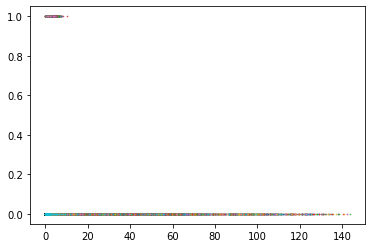

In [0]:
plt.plot(test, test_predictions,'.', ms=1)
plt.show()

# Question 3: Interesting things to Note

In [0]:
# Let's examine the test data 
test.T.describe()

House ID,11643173,11655020,11644367,11633356,11649905,11647887,11647719,11649920,11634330,11633656,11650025,11646966,11634329,11651030,11651623,11655259,11641229,11633651,11632577,11634000,11633485,11637986,11636044,11629699,11644029,11650967,11635377,11642552,11633945,11637542,11636207,11644838,11640753,11644766,11636491,11640484,11652631,11640480,11637016,11647739,...,11635360,11633056,11636584,11637295,11651073,11653897,11650992,11647947,11641115,11637226,11650322,11633461,11637308,11633967,11650235,11641232,11640323,11639536,11635171,11644751,11646907,11646871,11650608,11644585,11640900,11654974,11640734,11643165,11633526,11642749,11647979,11637181,11634223,11628915,11644595,11650964,11630831,11629770,11643171,11643369
count,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.00000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.00000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,...,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000
mean,0.813662,1.437956,3.136022,0.912132,0.743907,0.913916,0.606752,0.605954,0.531673,0.734915,0.626089,0.76410,0.767602,1.788046,0.505218,0.895474,0.796192,1.393878,0.814173,2.030842,0.79411,0.369376,0.674822,1.556801,2.458942,1.054472,1.244773,1.118550,0.720602,3.399786,0.767906,0.358220,0.855778,1.276915,0.863323,0.536084,0.965318,0.574097,0.392292,0.322952,...,0.551055,1.534090,1.337390,0.631321,2.804093,0.748956,4.476014,0.989501,0.489760,1.431600,0.915211,4.483186,0.480859,2.082069,1.036964,1.039024,0.484377,1.423489,1.374693,4.214066,1.669694,0.893054,1.135880,0.703885,0.817852,0.729876,0.518174,0.601286,0.863896,1.076065,1.999152,0.616324,0.862109,0.611708,1.574077,1.557965,0.864121,0.984469,0.875530,3.024410
std,0.942482,1.392418,1.102570,0.863280,1.062798,0.458616,0.493327,0.473766,0.463392,1.023468,0.323430,0.59965,0.471751,1.353299,0.451699,0.955022,0.963331,1.484267,0.560185,1.457015,0.81630,0.331495,0.533225,1.626234,0.226130,0.872864,0.654096,0.389076,0.345570,2.504862,0.375316,0.263537,0.638564,0.726478,0.845256,0.247504,0.679739,0.519456,0.375878,0.263372,...,0.475246,0.889401,1.034706,0.438603,0.751386,0.686043,1.601018,1.215843,0.584547,0.951230,0.470889,1.991798,0.488696,1.197353,1.154010,1.204090,0.594755,0.876624,0.957973,0.760853,1.719208,0.789807,0.428984,0.591370,1.076646,0.730020,0.645617,0.595906,1.063950,1.035237,1.660084,0.459953,0.879962,0.213677,1.097247,1.388536,0.573960,0.537613,0.498769,1.524625
min,0.168000,0.163000,1.136000,0.020000,0.000000,0.288000,0.014000,0.035000,0.038000,0.032000,0.208000,0.11700,0.092000,0.000000,0.021000,0.005000,0.028000,0.233000,0.157000,0.563000,0.08700,0.037000,0.088000,0.095000,1.856000,0.167000,0.366000,0.198000,0.092000,0.656000,0.095000,0.023000,0.010000,0.437000,0.115000,0.154000,0.146000,0.011000,0.000000,0.051000,...,0.000000,0.000000,0.127000,0.141000,1.498000,0.213000,0.800000,0.036000,0.026000,0.105000,0.180000,1.373000,0.005000,0.689000,0.089000,0.033000,0.061000,0.113000,0.227000,2.088000,0.204000,0.206000,0.371000,0.000000,0.008000,0.025000,0.002000,0.000000,0.000000,0.081000,0.053000,0.078000,0.042000,0.189000,0.000000,0.281000,0.000000,0.012000,0.125000,0.543000
25%,0.222000,0.288000,2.321000,0.072000,0.004000,0.514000,0.103000,0.165000,0.140000,0.121000,0.440000,0.23800,0.407000,

In [0]:
# Now let's only look at the houses that have electric cars
df_t=test.loc[test.index[numOfHousesWithCars_Transposed.columns]]
print(df_t.shape)
df_t.T.describe()

(45, 2880)


House ID,11633656,11641229,11654105,11633871,11654624,11648208,11651550,11637153,11652833,11637678,11641124,11640260,11647050,11644926,11630111,11643734,11640352,11654973,11650650,11646942,11643531,11628644,11635737,11636944,11642615,11631541,11631722,11640105,11637457,11650406,11653221,11650113,11634016,11632780,11634230,11633009,11644374,11651703,11639300,11647902,11638778,11644416,11647619,11650461,11649226
count,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000
mean,0.734915,0.796192,1.341634,1.089856,0.607944,0.714715,1.049812,1.104524,0.764981,1.026756,0.836391,1.910575,0.980567,0.649796,0.991111,1.317581,0.717027,0.863098,0.849742,1.165151,0.643006,0.994534,3.893136,0.871644,0.583317,0.812790,0.736313,0.828683,1.150103,0.600515,1.172734,0.636640,0.506285,0.987390,0.957120,0.634312,0.837354,0.865802,0.597992,1.078376,0.626905,1.240701,1.050319,0.825914,1.138784
std,1.023468,0.963331,1.051277,0.851395,0.910187,0.821863,1.204928,1.095798,0.760799,0.889152,0.938951,1.238811,1.031369,0.816108,0.992585,1.149735,0.706290,1.003664,1.012269,1.194348,0.979927,0.811447,5.566649,0.766000,0.823527,0.870853,0.802369,0.806954,1.634495,0.731111,1.217015,0.685646,0.637818,0.723160,1.178111,0.756413,0.989132,0.883713,0.675663,1.071523,0.842938,0.879271,1.058937,0.981406,0.923926
min,0.032000,0.028000,0.050000,0.122000,0.000000,0.035000,0.042000,0.158000,0.134000,0.011000,0.170000,0.119000,0.095000,0.064000,0.156000,0.088000,0.169000,0.037000,0.027000,0.180000,0.039000,0.122000,0.087000,0.000000,0.022000,0.107000,0.199000,0.025000,0.070000,0.049000,0.067000,0.097000,0.164000,0.288000,0.039000,0.050000,0.041000,0.086000,0.082000,0.212000,0.035000,0.065000,0.000000,0.045000,0.118000
25%,0.121000,0.173000,1.043250,0.742750,0.110000,0.235000,0.212000,0.413750,0.269000,0.449000,0.301000,1.057000,0.183000,0.194000,0.381000,0.427250,0.321000,0.137000,0.075000,0.506000,0.049000,0.533750,0.177000,0.446000,0.049000,0.330000,0.295000,0.395000,0.148000,0.152000,0.386000,0.240000,0.215000,0.531000,0.214750,0.246000,0.116000,0.265000,0.163000,0.429000,0.070000,0.834000,0.177000,0.170000,0.482750
50%,0.247500,0.449500,1.283000,0.862500,0.306500,0.447500,0.599000,0.595000,0.476500,0.587000,0.472000,1.515000,0.572000,0.329000,0.569000,1.103000,0.463000,0.473000,0.331000,0.884000,0.146000,0.694000,0.319500,0.715000,0.281000,0.558000,0.437500,0.658000,0.335000,0.423500,0.756000,0.559000,0.264000,0.894000,0.485000,0.389000,0.521500,0.414500,0.521078,0.643500,0.560000,0.929000,0.231500,0.442000,0.927000
75%,0.984000,1.067000,1.472250,1.231000,0.685000,0.755000,1.421000,1.245000,1.112750,1.373250,0.812500,2.347000,1.570250,0.785500,1.231000,1.673000,0.926250,1.294250,1.380250,1.102250,0.908000,1.069250,5.928250,0.968250,0.779250,0.923250,0.850000,0.790000,1.605000,0.721250,1.294000,0.725000,0.564000,1.119000,1.210250,0.727000,1.133250,1.338248,0.750250,1.322500,0.725000,1.256250,1.739000,1.055000,1.375000
max,7.509256,7.696803,7.551256,5.405256,5.002256,6.855256,9.069256,6.148256,5.484256,7.796128,6.176256,8.315256,6.724256,5.566256,7.668256,6.620256,4.734256,6.588256,6.001256,7.728256,5.712256,5.758256,33.993000,5.916256,5.007256,4.923256,6.044860,5.922256,10.302256,5.640256,6.987355,4.938256,3.970256,5.975256,7.623256,5.773256,7.328492,4.753128,4.528256,7.471594,5.300256,7.234543,5.554256,5.954256,7.207256


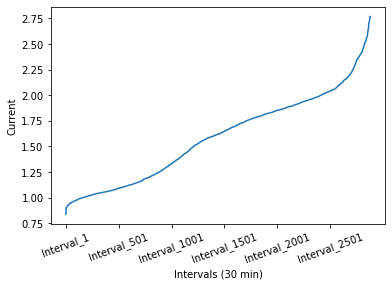

In [92]:
# Plot average current over time
avgs = test.mean(axis=0).sort_values()
plt.plot(avgs)
plt.xticks(range(0,2880,500), test.columns[range(0,2880,500)],rotation=20) # Fix interavls
plt.xlabel('Intervals (30 min)')
plt.ylabel('Current')
plt.show()

In [0]:
# How long do people have their car plugged in?
